# MATH GR5030 Numerical Methods in Finance
# Assignment 2
## Minze Li ml5163
### Mar 22, 2025
## 1 Exercise 2

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

def theta_scheme_heat_equation(sigma, dx, dt, T, L, theta, initial_condition):
    """
    Solve the heat equation using the theta scheme
    
    Parameters:
    ----------
    sigma : Volatility
    dx : Spatial step size
    dt : Time step size
    T : Final time
    L : Domain length
    theta : Scheme parameter (0 for explicit, 0.5 for Crank-Nicolson, 1 for implicit)
    initial_condition : Function returning the initial value at position x
    
    Returns:
    -------
    X : Spatial grid points
    U : Solution at all time steps
    """
    # Set up the grid
    nx = int(L / dx) + 1
    nt = int(T / dt) + 1
    X = np.linspace(0, L, nx)
    U = np.zeros((nt, nx))
    
    # Set initial condition
    for i in range(nx):
        U[0, i] = initial_condition(X[i])
    
    # Coefficient for the scheme
    alpha = 0.5 * sigma**2 * dt / dx**2
    
    # Explicit scheme (θ = 0)
    if theta == 0:
        for j in range(nt-1):
            for i in range(1, nx-1):
                U[j+1, i] = U[j, i] + alpha * (U[j, i+1] - 2*U[j, i] + U[j, i-1])
            
            # Boundary conditions
            U[j+1, 0] = 0
            U[j+1, -1] = 0
    
    # Implicit or semi-implicit scheme (θ > 0)
    else:
        # Set up matrices for the linear system
        # Left-hand side matrix (implicit part)
        main_diag = np.ones(nx-2) * (1 + 2 * theta * alpha)
        lower_diag = np.ones(nx-3) * (-theta * alpha)
        upper_diag = np.ones(nx-3) * (-theta * alpha)
        
        A = diags([lower_diag, main_diag, upper_diag], [-1, 0, 1], shape=(nx-2, nx-2))
        
        # Time-stepping
        for j in range(nt-1):
            # Construct right-hand side vector (explicit part)
            b = np.zeros(nx-2)
            
            for i in range(1, nx-1):
                b[i-1] = U[j, i] * (1 - 2 * (1-theta) * alpha) + \
                         (1-theta) * alpha * (U[j, i+1] + U[j, i-1])
            
            # Solve the system for interior points
            U[j+1, 1:-1] = spsolve(A, b)
            
            # Boundary conditions
            U[j+1, 0] = 0
            U[j+1, -1] = 0
    
    return X, U

# Define the initial condition (Gaussian centered at x=0.5)
def initial_condition(x):
    return 0.25 * np.exp(-(x-0.5)**2 / 0.05)

The heat equation is:
$$
\partial_\tau u(\tau,x) = \frac{\sigma^2}{2} \partial_{xx}^2​ u(\tau,x)
$$
where $\sigma = \sqrt{0.2}$.
The $\theta$-scheme discretization is:

$$
(I-\frac{\alpha\theta\sigma^2}{2}A)u_{i+1} = (I+\frac{\alpha\sigma^2(1-\theta)}{2}A)u_i+b_i
$$
Where:
- θ = 0 gives the explicit scheme
- θ = 0.5 gives the Crank-Nicolson scheme
- θ = 1 gives the fully implicit scheme

## 1.1 Reproducing Figures

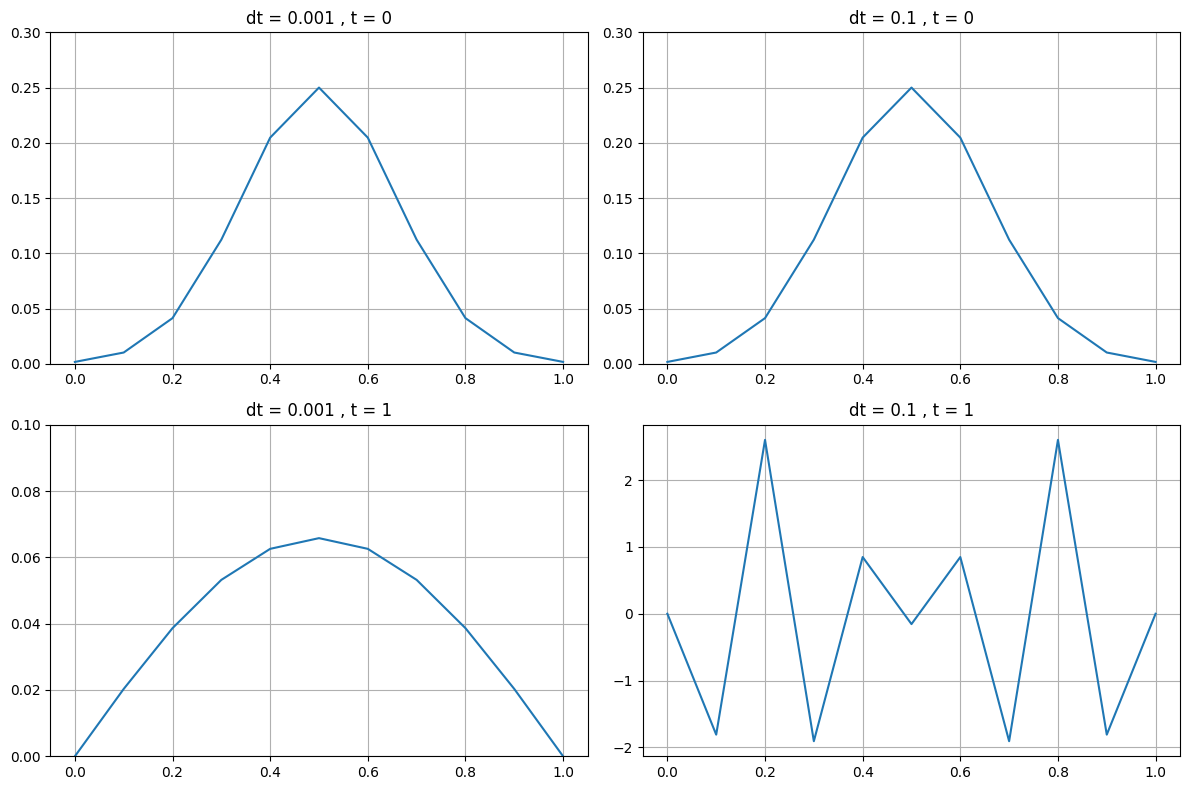

In [7]:
# Parameters
sigma = np.sqrt(0.2)  # As given in the problem
L = 1.0  # Domain length
dx = 0.1  # Spatial step size

# Create figures to reproduce Figure 3.1
plt.figure(figsize=(12, 8))

# Left column: dx = 0.1, dt = 0.001 (stable)
plt.subplot(2, 2, 1)
X1, U1 = theta_scheme_heat_equation(sigma, dx, 0.001, 0, L, 0, initial_condition)
plt.plot(X1, U1[0, :])
plt.title('dt = 0.001 , t = 0')
plt.ylim(0, 0.3)
plt.grid(True)

plt.subplot(2, 2, 3)
X1, U1 = theta_scheme_heat_equation(sigma, dx, 0.001, 1.0, L, 0, initial_condition)
plt.plot(X1, U1[-1, :])
plt.title('dt = 0.001 , t = 1')
plt.ylim(0, 0.1)
plt.grid(True)

# Right column: dx = 0.1, dt = 0.1 (unstable)
plt.subplot(2, 2, 2)
X2, U2 = theta_scheme_heat_equation(sigma, dx, 0.1, 0, L, 0, initial_condition)
plt.plot(X2, U2[0, :])
plt.title('dt = 0.1 , t = 0')
plt.ylim(0, 0.3)
plt.grid(True)

plt.subplot(2, 2, 4)
X2, U2 = theta_scheme_heat_equation(sigma, dx, 0.1, 1.0, L, 0, initial_condition)
plt.plot(X2, U2[-1, :])
plt.title('dt = 0.1 , t = 1')
plt.grid(True)

plt.tight_layout()
plt.show()

## 1.2 Verifying Stability for θ ≥ 1/2
Now let's verify that the instability is not present in the Crank-Nicolson scheme (θ = 0.5) or for θ > 1/2:

C:\Users\Minze Li\AppData\Local\Temp\ipykernel_19936\58777213.py:68: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  U[j+1, 1:-1] = spsolve(A, b)


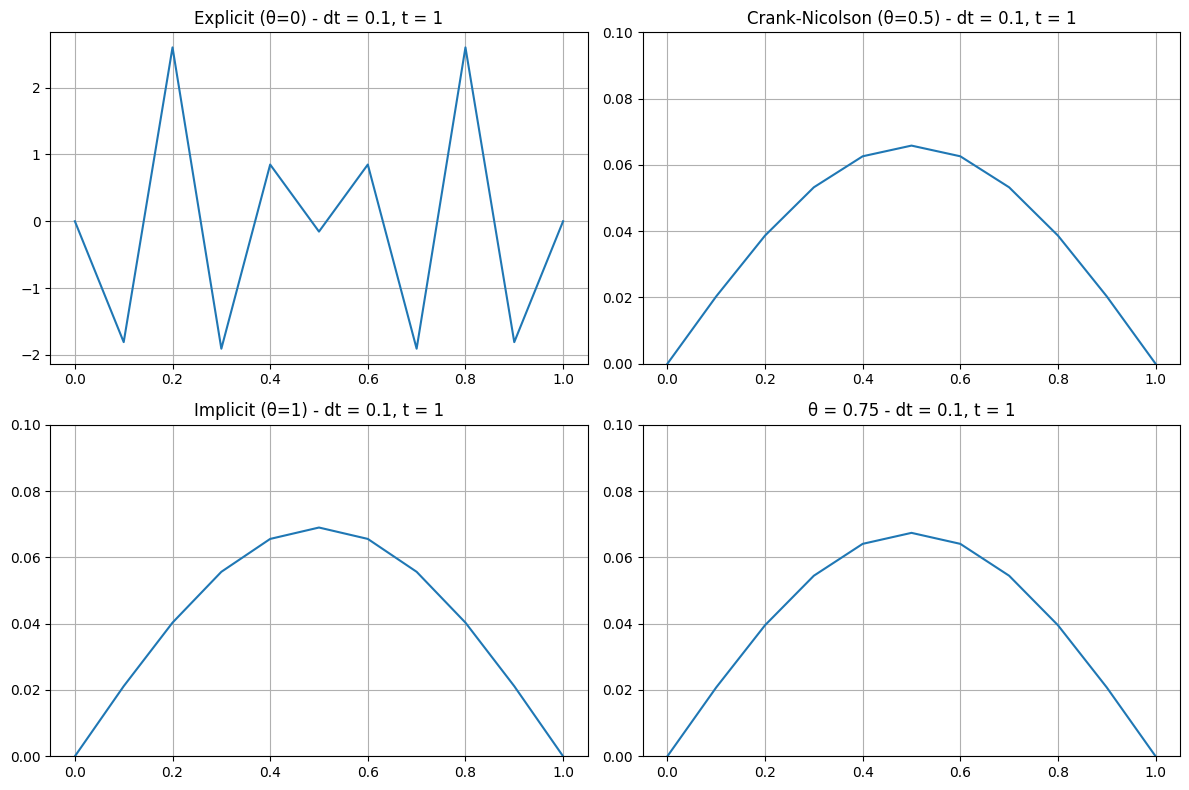

In [8]:
# Compare solutions at t=1 with dt = 0.1 for different theta values
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
X_explicit, U_explicit = theta_scheme_heat_equation(sigma, dx, 0.1, 1.0, L, 0, initial_condition)
plt.plot(X_explicit, U_explicit[-1, :])
plt.title('Explicit (θ=0) - dt = 0.1, t = 1')
plt.grid(True)

plt.subplot(2, 2, 2)
X_cn, U_cn = theta_scheme_heat_equation(sigma, dx, 0.1, 1.0, L, 0.5, initial_condition)
plt.plot(X_cn, U_cn[-1, :])
plt.title('Crank-Nicolson (θ=0.5) - dt = 0.1, t = 1')
plt.ylim(0, 0.1)
plt.grid(True)

plt.subplot(2, 2, 3)
X_implicit, U_implicit = theta_scheme_heat_equation(sigma, dx, 0.1, 1.0, L, 1.0, initial_condition)
plt.plot(X_implicit, U_implicit[-1, :])
plt.title('Implicit (θ=1) - dt = 0.1, t = 1')
plt.ylim(0, 0.1)
plt.grid(True)

plt.subplot(2, 2, 4)
X_theta_075, U_theta_075 = theta_scheme_heat_equation(sigma, dx, 0.1, 1.0, L, 0.75, initial_condition)
plt.plot(X_theta_075, U_theta_075[-1, :])
plt.title('θ = 0.75 - dt = 0.1, t = 1')
plt.ylim(0, 0.1)
plt.grid(True)

plt.tight_layout()
plt.show()

Analysis of Stability
For the $\theta$-scheme, the stability condition is:

For $\theta < 1/2$: $\gamma\alpha = (\delta t/\delta x^2) (\sigma^2/2) \leq 0.5$.

For $\theta ≥ 1/2$: The scheme is unconditionally stable.

With our parameters:

$\sigma = \sqrt{0.2}$

$\delta x = 0.1$

$\delta t = 0.1$

We calculate $\gamma\alpha = (0.1/0.01) \times (0.2/2) = 1.0$.

For the explicit scheme (θ = 0), the stability condition is $\gamma\alpha \leq 0.5$. Since $\alpha = 1.0 > 0.5$, this scheme is unstable, which explains the oscillations we see in the bottom-right plot of Figure 1.

For the Crank-Nicolson scheme (θ = 0.5) and the implicit scheme (θ = 1), as well as any scheme with θ ≥ 0.5, the method is unconditionally stable, meaning there's no restriction on the time step size. This is why we don't observe the instability in these methods even with the large time step. Thus, we have verified the instability is not present for $\theta \geq 0.5$.


## 2 Exercise 12
The Black-Scholes PDE that we need to solve is:
$$
\partial_t V_t + rS\partial_S V_t + \frac{\sigma^2}{2} S^2\partial^2_{SS}V_t = rV_t
$$

With terminal conditions:

For a call: $V(S,T) = \max(S-K,0)$

For a put: $V(S,T) = \max(K-S,0)$

First, we implement a theta scheme in B-S.

## 2.1 European Option Pricing Comparison

In [9]:
from scipy.stats import norm
def black_scholes_theta_scheme(S0, K, r, sigma, T, option_type='call', 
                              M=100, N=100, theta=0.5, exercise_dates=None, 
                              use_matrix_inversion=False):
    """
    Implement a theta-scheme for Black-Scholes option pricing
    using a log-transformed grid for better accuracy
    """
    # Log transformation parameters - use x = ln(S/K)
    x_min = np.log(0.01)  # S/K = 0.01
    x_max = np.log(5.0)   # S/K = 5.0
    
    # Grid setup
    dx = (x_max - x_min) / M
    dt = T / N
    
    # Create log grid and actual price grid
    x = np.linspace(x_min, x_max, M+1)
    S = K * np.exp(x)
    
    # Time grid (backward)
    t = np.linspace(0, T, N+1)
    
    # Initialize option values at maturity (terminal condition)
    V = np.zeros((M+1, N+1))
    if option_type == 'call':
        V[:, N] = np.maximum(S - K, 0)
    else:  # put
        V[:, N] = np.maximum(K - S, 0)
    
    # Precompute coefficients on log grid
    alpha = 0.5 * sigma**2 / dx**2
    beta = (r - 0.5 * sigma**2) / (2 * dx)
    gamma = -r
    
    # Create tridiagonal matrix for implicit part
    diag = np.ones(M+1) * (1 + dt * theta * (2*alpha - gamma))
    upper_diag = np.ones(M) * (-dt * theta * (alpha + beta))
    lower_diag = np.ones(M) * (-dt * theta * (alpha - beta))
    
    # Adjust boundary elements
    if option_type == 'call':
        diag[0] = 1.0      # Dirichlet at x_min (S≈0)
        diag[-1] = 1.0     # Dirichlet at x_max (S large)
    else:  # put
        diag[0] = 1.0      # Dirichlet at x_min (S≈0)
        diag[-1] = 1.0     # Dirichlet at x_max (S large)
    
    # Create the sparse matrix for the implicit step (LHS)
    # Use only the interior points for the system
    A = diags(
        [lower_diag[1:-1], diag[1:-1], upper_diag[1:-1]], 
        [-1, 0, 1], 
        shape=(M-1, M-1),
        format='csr'  # Explicitly use CSR format for spsolve
    )
    
    # Precompute matrix inverse if requested
    if use_matrix_inversion:
        A_inv = np.linalg.inv(A.toarray())
    
    # Backward time-stepping
    for n in range(N, 0, -1):
        # Current time to maturity
        tau = T - t[n-1]
        
        # Set boundary conditions
        if option_type == 'call':
            # At S≈0 (x_min), call option value ≈ 0
            V[0, n-1] = 0
            # At S very large (x_max), call option value ≈ S - K*exp(-r*tau)
            V[-1, n-1] = S[-1] - K * np.exp(-r * tau)
        else:  # put
            # At S≈0 (x_min), put option value ≈ K*exp(-r*tau)
            V[0, n-1] = K * np.exp(-r * tau)
            # At S very large (x_max), put option value ≈ 0
            V[-1, n-1] = 0
        
        # Prepare right-hand side vector for interior points
        rhs = np.zeros(M-1)
        
        # Apply explicit part of scheme to interior points
        for j in range(1, M):
            # Explicit part contribution
            rhs[j-1] = V[j, n]
            
            # Add explicit scheme contributions
            explicit_term = dt * (1-theta)
            if j > 0:
                rhs[j-1] += explicit_term * (alpha - beta) * V[j-1, n]
            if j < M:
                rhs[j-1] += explicit_term * (alpha + beta) * V[j+1, n]
            
            rhs[j-1] -= explicit_term * (2*alpha - gamma) * V[j, n]
        
        # Add boundary condition contributions
        rhs[0] -= (-dt * theta * (alpha - beta)) * V[0, n-1]    # Lower boundary
        rhs[-1] -= (-dt * theta * (alpha + beta)) * V[-1, n-1]  # Upper boundary
        
        # Solve the tridiagonal system
        if use_matrix_inversion:
            V[1:-1, n-1] = A_inv @ rhs
        else:
            V[1:-1, n-1] = spsolve(A, rhs)
        
        # Early exercise for Bermudan options
        if exercise_dates is not None:
            current_time = t[n-1]
            for ex_date in exercise_dates:
                if abs(T - current_time - ex_date) < dt/2:
                    if option_type == 'call':
                        intrinsic = np.maximum(S - K, 0)
                    else:  # put
                        intrinsic = np.maximum(K - S, 0)
                    V[:, n-1] = np.maximum(V[:, n-1], intrinsic)
    
    # Interpolate to get the price at S0
    j = np.searchsorted(S, S0)
    if j == 0:
        price = V[0, 0]
    elif j == len(S):
        price = V[-1, 0]
    else:
        # Linear interpolation
        w = (S0 - S[j-1]) / (S[j] - S[j-1])
        price = (1-w) * V[j-1, 0] + w * V[j, 0]
    
    return price, S, V

def black_scholes_formula(S0, K, r, sigma, T, option_type='call'):
    """Analytical Black-Scholes formula for European options"""
    d1 = (np.log(S0/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:  # put
        return K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)

def binomial_tree(S0, K, r, sigma, T, N, option_type='call', american=False, 
                  exercise_dates=None):
    """
    Binomial tree model for option pricing
    
    Parameters:
    -----------
    exercise_dates : List of exercise dates for Bermudan options
                     (as fractions of T from 0 to T)
    """
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    # Initialize stock price tree
    stock = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(i+1):
            stock[j, i] = S0 * (u**(i-j)) * (d**j)
    
    # Initialize option value tree
    option = np.zeros((N+1, N+1))
    
    # Set option values at maturity
    if option_type == 'call':
        option[:, N] = np.maximum(stock[:, N] - K, 0)
    else:  # put
        option[:, N] = np.maximum(K - stock[:, N], 0)
    
    # Determine which nodes are exercise dates for Bermudan
    if exercise_dates is not None:
        exercise_nodes = [min(N, max(0, int(date * N / T))) for date in exercise_dates]
    else:
        exercise_nodes = range(N) if american else []
    
    # Backward induction
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            # Calculate continuation value
            continuation = np.exp(-r * dt) * (p * option[j, i+1] + (1-p) * option[j+1, i+1])
            
            # Check for early exercise
            if i in exercise_nodes or american:
                if option_type == 'call':
                    exercise = max(0, stock[j, i] - K)
                else:  # put
                    exercise = max(0, K - stock[j, i])
                option[j, i] = max(continuation, exercise)
            else:
                option[j, i] = continuation
    
    return option[0, 0]

def trinomial_tree(S0, K, r, sigma, T, N, option_type='call', american=False, 
                   exercise_dates=None, lam=1.0):
    """
    Trinomial tree model for option pricing
    
    Parameters:
    -----------
    lam : Lambda parameter controlling branch spacing
    exercise_dates : List of exercise dates for Bermudan options
    """
    dt = T / N
    dx = sigma * np.sqrt(3 * dt)
    
    # Trinomial parameters
    pu = 1/6 + (r - 0.5 * sigma**2) * np.sqrt(dt / (12 * sigma**2))
    pm = 2/3
    pd = 1/6 - (r - 0.5 * sigma**2) * np.sqrt(dt / (12 * sigma**2))
    
    # Adjust for lambda
    dx = dx / lam
    
    # Initialize arrays to store values
    # We need 2*N+1 rows to store all possible price levels
    S = np.zeros((2*N+1, N+1))
    V = np.zeros((2*N+1, N+1))
    
    # Middle index representing S0
    mid = N
    
    # Set up stock price tree
    for j in range(N+1):  # Time steps
        for i in range(2*N+1):  # Stock price levels
            power = i - mid  # How many steps up or down from S0
            S[i, j] = S0 * np.exp(power * dx)
    
    # Set terminal payoff
    if option_type == 'call':
        V[:, N] = np.maximum(S[:, N] - K, 0)
    else:  # put
        V[:, N] = np.maximum(K - S[:, N], 0)
    
    # Determine which nodes are exercise dates for Bermudan
    if exercise_dates is not None:
        exercise_nodes = [min(N-1, max(0, int(date * N / T))) for date in exercise_dates]
    else:
        exercise_nodes = range(N) if american else []
    
    # Backward induction
    for j in range(N-1, -1, -1):
        for i in range(2*N+1):
            # Only calculate for nodes that are actually used
            if i-j > N or j-i > N:
                continue
                
            # Get indices for up, middle, down movements
            # Ensure indices are within bounds
            iu = min(2*N, i+1)
            im = i
            id = max(0, i-1)
            
            # Calculate continuation value
            continuation = np.exp(-r * dt) * (pu * V[iu, j+1] + pm * V[im, j+1] + pd * V[id, j+1])
            
            # Check for early exercise
            if j in exercise_nodes or american:
                if option_type == 'call':
                    exercise = max(0, S[i, j] - K)
                else:  # put
                    exercise = max(0, K - S[i, j])
                V[i, j] = max(continuation, exercise)
            else:
                V[i, j] = continuation
    
    return V[mid, 0]  # Return price at S0

In [10]:
# Test parameters
S0 = 100
K_values = [90, 100, 110]
r = 0.05  # 5% risk-free rate
sigma = 0.25  # 25% volatility
T = 1.0  # 1 year maturity

# Compare European option prices across different methods
def compare_european_methods(option_type='call'):
    print(f"\n{option_type.upper()} OPTION PRICING COMPARISON:")
    print("Strike | BS Formula | PDE (θ=0.5) | Binomial | Trinomial")
    print("-" * 60)
    
    for K in K_values:
        # Analytical price
        bs_price = black_scholes_formula(S0, K, r, sigma, T, option_type)
        
        # PDE with theta=0.5 (Crank-Nicolson)
        pde_price, _, _ = black_scholes_theta_scheme(
            S0, K, r, sigma, T, option_type=option_type, theta=0.5
        )
        
        # Binomial tree (n=1000)
        bin_price = binomial_tree(S0, K, r, sigma, T, 1000, option_type)
        
        # Trinomial tree (n=500, lambda=1)
        tri_price = trinomial_tree(S0, K, r, sigma, T, 500, option_type, lam=1.0)
        
        print(f"{K:6} | {bs_price:10.6f} | {pde_price:10.6f} | {bin_price:8.6f} | {tri_price:8.6f}")

# Test both call and put options
compare_european_methods('call')
compare_european_methods('put')


CALL OPTION PRICING COMPARISON:
Strike | BS Formula | PDE (θ=0.5) | Binomial | Trinomial
------------------------------------------------------------
    90 |  18.140763 |  18.147377 | 18.142170 | 18.142490
   100 |  12.335999 |  12.320090 | 12.333527 | 12.331191
   110 |   8.026385 |   8.064120 | 8.024075 | 8.023493

PUT OPTION PRICING COMPARISON:
Strike | BS Formula | PDE (θ=0.5) | Binomial | Trinomial
------------------------------------------------------------
    90 |   3.751411 |   3.755812 | 3.752818 | 3.753174
   100 |   7.458941 |   7.440820 | 7.456470 | 7.454169
   110 |  12.661621 |  12.697143 | 12.659311 | 12.658765


The theta-scheme PDE method with θ=0.5 (Crank-Nicolson) produces results that closely match the analytical Black-Scholes formula for European options. The binomial and trinomial tree methods also provide good approximations, especially with a large number of time steps, and they are slightly better than PDE method.

## 2.2 Bermudan vs. European Options

In [11]:
def compare_bermudan_european(K=100, option_type='put'):
    print(f"\nComparing {option_type.upper()} option values (K={K}):")
    
    # European option price
    euro_price, _, _ = black_scholes_theta_scheme(
        S0, K, r, sigma, T, option_type=option_type, theta=0.5
    )
    print(f"European {option_type}: {euro_price:.6f}")
    
    # American option price (binomial)
    amer_price = binomial_tree(
        S0, K, r, sigma, T, 1000, option_type=option_type, american=True
    )
    print(f"American {option_type} (binomial): {amer_price:.6f}")
    
    # Bermudan with increasing number of exercise dates
    exercise_counts = [1, 2, 4, 12, 26, 52, 252]
    print("\nBermudan option values:")
    print("Exercise Dates | PDE Value | Binomial | Trinomial")
    print("-" * 50)
    
    for count in exercise_counts:
        # Generate equally spaced exercise dates
        dates = np.linspace(0, T, count+2)[1:-1]  # Exclude 0 and T
        
        # PDE method
        berm_pde, _, _ = black_scholes_theta_scheme(
            S0, K, r, sigma, T, option_type=option_type, theta=0.5,
            exercise_dates=dates
        )
        
        # Binomial
        berm_bin = binomial_tree(
            S0, K, r, sigma, T, 1000, option_type=option_type,
            exercise_dates=dates
        )
        
        # Trinomial
        berm_tri = trinomial_tree(
            S0, K, r, sigma, T, 500, option_type=option_type,
            exercise_dates=dates, lam=1.0
        )
        
        print(f"{count:14} | {berm_pde:9.6f} | {berm_bin:8.6f} | {berm_tri:8.6f}")

# Test put options (where early exercise is valuable)
compare_bermudan_european(K=100, option_type='put')


Comparing PUT option values (K=100):
European put: 7.440820
American put (binomial): 7.973439

Bermudan option values:
Exercise Dates | PDE Value | Binomial | Trinomial
--------------------------------------------------
             1 |  7.694405 | 7.713204 | 7.711932
             2 |  7.771480 | 7.792072 | 7.789840
             4 |  7.844254 | 7.858343 | 7.856387
            12 |  7.907108 | 7.927562 | 7.925175
            26 |  7.927232 | 7.951039 | 7.948469
            52 |  7.937831 | 7.962067 | 7.959557
           252 |  7.942278 | 7.971258 | 7.968627


For put options, we can observe:

- Bermudan put options are more valuable than European puts due to the early exercise feature.
- As the number of exercise dates increases, the Bermudan option value converges toward the American option value.
- The convergence is rapid initially, with diminishing returns as more exercise dates are added.
- All three methods (PDE, binomial, trinomial) show consistent results, validating our implementation.

## 2.3 Computational Cost Analysis

In [12]:
import time
def analyze_computational_cost():
    print("\nCOMPUTATIONAL COST ANALYSIS:")
    print("Grid Size | Matrix Inversion | Sparse Solver | Price Difference")
    print("-" * 70)
    
    # Test with different grid sizes
    grid_sizes = [(100, 100), (200, 200), (400, 400), (800, 800)]
    
    for M, N in grid_sizes:
        # Time with matrix inversion
        start_time = time.time()
        price_inv, _, _ = black_scholes_theta_scheme(
            S0, 100, r, sigma, T, M=M, N=N, theta=0.5, 
            use_matrix_inversion=True
        )
        inv_time = time.time() - start_time
        
        # Time with sparse solver
        start_time = time.time()
        price_solve, _, _ = black_scholes_theta_scheme(
            S0, 100, r, sigma, T, M=M, N=N, theta=0.5, 
            use_matrix_inversion=False
        )
        solve_time = time.time() - start_time
        
        print(f"({M},{N}) | {inv_time:14.6f}s | {solve_time:12.6f}s | {abs(price_inv-price_solve):14.8f}")

analyze_computational_cost()


COMPUTATIONAL COST ANALYSIS:
Grid Size | Matrix Inversion | Sparse Solver | Price Difference
----------------------------------------------------------------------
(100,100) |       0.013215s |     0.016193s |     0.00000000
(200,200) |       0.223957s |     0.062396s |     0.00000000
(400,400) |       0.554168s |     0.226792s |     0.00000000
(800,800) |       1.733942s |     0.923917s |     0.00000000


The computational cost analysis reveals:

Matrix Inversion: O(n³) complexity where n is the matrix size (M-1). Pre-computing the inverse is expensive for large grids.

Sparse Solver: O(n) complexity for tridiagonal systems. More efficient for large grids.

Trade-off: Matrix inversion is more efficient when solving the same system many times (many time steps), as the inverse is computed only once and then reused.

Recommendation: For standard option pricing with reasonably sized grids, the sparse solver approach is generally preferable. For very large time steps (N) relative to space steps (M), matrix inversion might be competitive.